<a href="https://colab.research.google.com/github/jspe406/C964/blob/main/house_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [18]:
# using built in data on California Housing Data from sklearn
house_price_dataset = sklearn.datasets.fetch_california_housing()
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

This needs to be converted to a pandas dataframe which will enable us to visualize, clean and use the data more efficiently

In [19]:
housing = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)
housing.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [22]:
# Add target column
housing['Price'] = house_price_dataset.target
housing.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [23]:
# Check the number of rows and colums
housing.shape

(20640, 9)

In [24]:
# check for missing values
housing.isnull().sum

<bound method DataFrame.sum of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False     False     False   

       Longitude  Price  
0          False  False  
1          False  False  
2          False  False  
3          False  False  
4          False  False  
...          ...    ...  
20635      False  False  
20636      False  False  
20637      False  False  
20638      False  False  
20639      False  False  

[20640 rows x 9 columns]>

In [25]:
# Statistical measures of the dataset
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

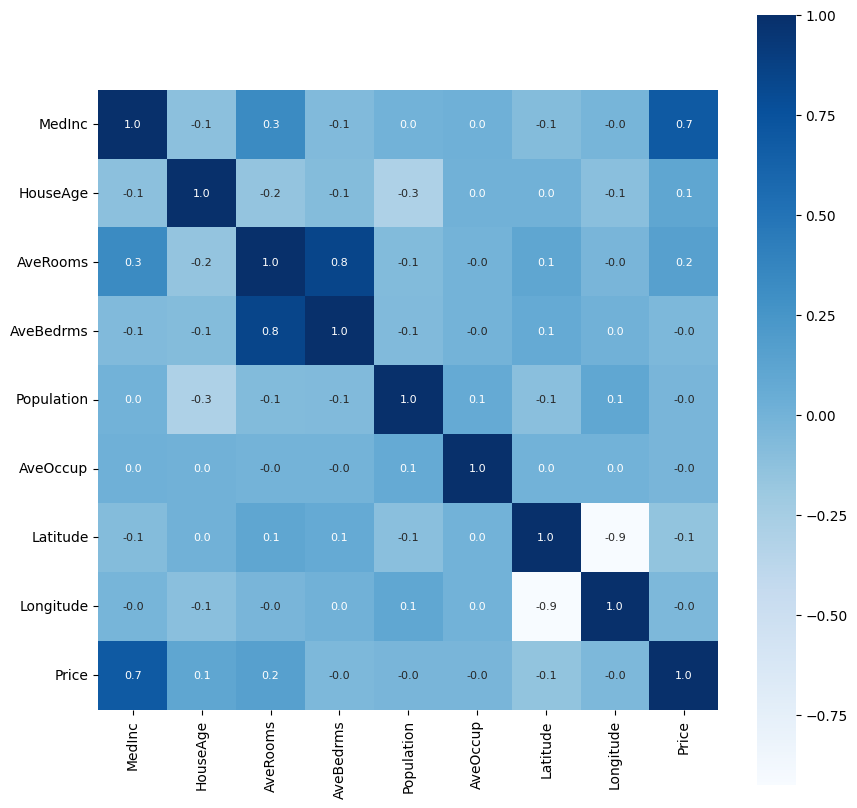

In [27]:
# Correlation between various features in the dataset
correlation = housing.corr()
# Heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [28]:
# Split the data and target
X = housing.drop(['Price'], axis=1)
Y = housing['Price']
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [29]:
# Split the data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [30]:
# Load the XGBoost Regressor for model training
model = XGBRegressor()

In [31]:
# Training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
# Accuracy for prediction on Training data
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [34]:
# R squared Error
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared Error: ', r2_train)

# Mean Absolute Error
mae_train = metrics.mean_absolute_error(Y_train, training_data_prediction)
print('Mean Absolute Error: ', mae_train)

R squared Error:  0.943650140819218
Mean Absolute Error:  0.1933648700612105


In [36]:
# Accuracy for prediction on test data
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]


In [37]:
# R squared Error
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared Error: ', r2_test)

# Mean Absolute Error
mae_test = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('Mean Absolute Error: ', mae_test)

R squared Error:  0.8338000331788725
Mean Absolute Error:  0.3108631800268186


## 1. Scatter Plot with Regression Line:
This plot compares the actual house prices (Y_test) with the predicted house prices (test_data_prediction) from the model. It also includes a regression line which shows the general trend of the model's predictions. Ideally, the points should cluster tightly around the regression line, indicating good predictions. If the points are scattered widely or deviate from the line significantly, it implies that the model is not accurately capturing the relationship between the features and the target.

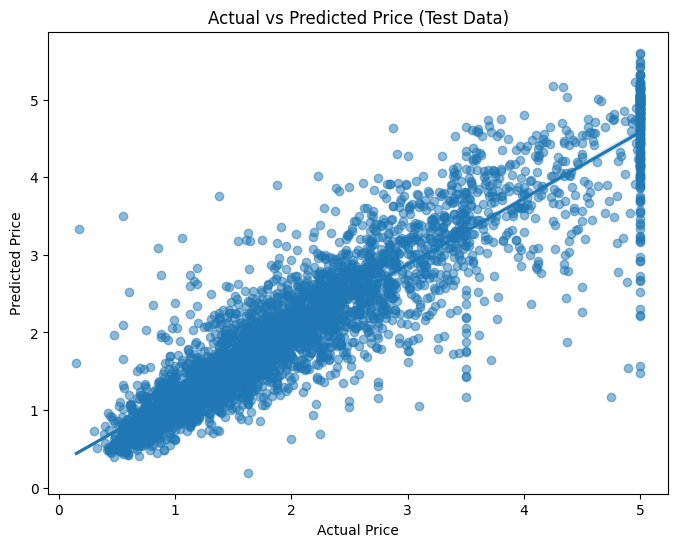

In [42]:
# 1. Scatter Plot with Regression Line
plt.figure(figsize=(8, 6))
sns.regplot(x=Y_test, y=test_data_prediction, scatter_kws={'alpha':0.5})
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Test Data)")
plt.show()

## 2. Residual Plot:
The residuals are the differences between the actual prices and the predicted prices (Y_test - test_data_prediction). This plot shows the residuals against the predicted values. A good model should have residuals randomly scattered around zero, with no clear patterns or trends. If we see patterns in the residuals, it suggests that the model is systematically under- or over-estimating the prices in certain regions. For example, if the residuals have a curved shape, it might indicate that the model's predictions are not linear.

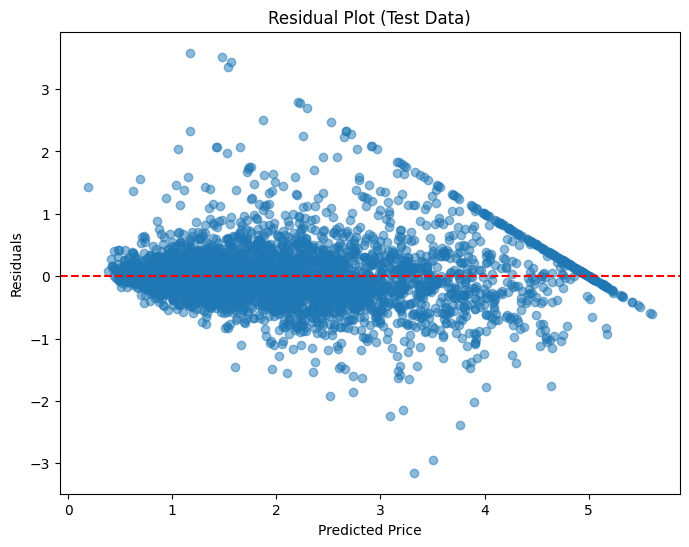

In [43]:
# 2. Residual Plot
plt.figure(figsize=(8, 6))
residuals = Y_test - test_data_prediction
plt.scatter(test_data_prediction, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Data)")
plt.show()

## 3. Distribution of Residuals:
This histogram shows the distribution of the residuals. A well-performing model should have residuals that are normally distributed with a mean of zero. If the distribution is skewed or has a large spread, it indicates that the model's errors are not consistent or reliable. A normal distribution implies that the model's errors are random and unbiased, which is desired for accurate predictions.


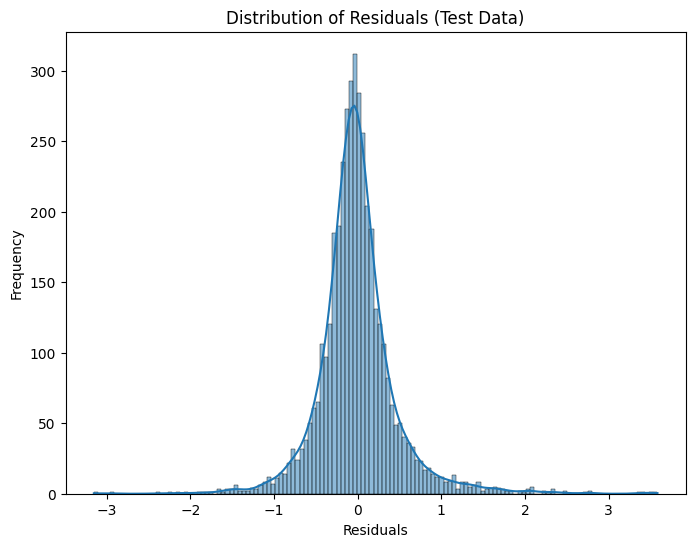

In [44]:
# 3. Distribution of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Test Data)")
plt.show()

In summary, these three plots help us assess the performance and potential issues of the trained model by visually inspecting the relationship between actual and predicted values, the presence of patterns in the errors, and the distribution of the errors.

In [48]:
# Create a new column in the housing dataframe with the predicted prices
housing['Predicted_Price'] = model.predict(X)

# Display the updated dataframe with the predicted prices
print(housing.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  Predicted_Price  
0    -122.23  4.526         4.300086  
1    -122.22  3.585         4.590637  
2    -122.24  3.521         3.805510  
3    -122.25  3.413         3.250378  
4    -122.25  3.422         2.293168  


In [52]:
#@title Interactive Querying with ipywidgets

import ipywidgets as widgets
from IPython.display import display

# Function to filter the DataFrame based on user input
def filter_data(MedInc, HouseAge):
  filtered_df = housing[(housing['MedInc'] >= MedInc) & (housing['HouseAge'] <= HouseAge)]
  print(filtered_df.head())


# Create widgets for user input
medinc_slider = widgets.FloatSlider(value=2, min=0, max=15, step=0.1, description='MedInc:')
houseage_slider = widgets.IntSlider(value=50, min=0, max=50, step=1, description='HouseAge:')

# Create an output widget to display the filtered data
output = widgets.Output()

# Define a function to handle widget interactions
def on_value_change(change):
  with output:
    output.clear_output()
    filter_data(medinc_slider.value, houseage_slider.value)

# Observe the widget values for changes
medinc_slider.observe(on_value_change, names='value')
houseage_slider.observe(on_value_change, names='value')


# Display widgets and output
display(medinc_slider, houseage_slider, output)


FloatSlider(value=2.0, description='MedInc:', max=15.0)

IntSlider(value=50, description='HouseAge:', max=50)

Output()